# TDT4173: Machine Learning and Case-Based Reasoning - Assignment 1
### Author: Vittorio Triassi 

For the purpose of the following assignment, we will be using *numpy* to better manipulate our datasets and *matplotlib* to show our results.

## Task 1 - Linear Regression

In [1]:
# Import of the libraries that will be used
import numpy as np
import matplotlib.pyplot as plt

#### 1. Implement linear regression with ordinary least squares (OLS) using the closed-form solution seen in Equation 9. Tip: This can be done in a single line of code!

To solve the following task, we will write a function called **computeWeights** in which, provided the matrix *X* and its labels vector *y*, we are able to compute the set of the weights we need for the Linear Regression.

\begin{align}
    w = (X^TX)^{-1}X^Ty
\end{align}



In [2]:
def computeWeights(X, y):
    w = np.linalg.pinv((X.T.dot(X))).dot(X.T).dot(y)
    return w

#### 2. Load the data in *train_2d_reg_data.csv* (training data) and *test_2d_reg_data.csv* (test data) and use your OLS implementation to find a set of good weights for the training data. Show the weights as well as the model error $E_{mse}(w)$ for the training and test set after training. Is your model generalizing well?

In [3]:
# We read the csv files by using genfromtxt
x_1, x_2, y = np.genfromtxt('dataset/regression/train_2d_reg_data.csv', delimiter=',', usecols=(0,1,2), unpack=True)
x_1_test, x_2_test, y_test = np.genfromtxt('dataset/regression/test_2d_reg_data.csv', delimiter=',', usecols=(0,1,2), unpack=True)

In order to carry out the following task, we need to store our data into two structures: the input matrix **X**, and the **y** vector which will contain the real-valued output. The **X** matrix has to be modified by adding a column of ones. This will let us to include the bias in the computation. Moreover, since our csv files have an extra row (the first one) that defines the columns, we will get rid of it since we need to fill our matrices just with proper examples.

In [4]:
X0 = np.ones(y.shape[0])
X = np.column_stack((X0, x_1, x_2))
X = np.delete(X, 0, axis=0)
y = np.delete(y, 0, axis=0)

X0_test = np.ones(y_test.shape[0])
X_test = np.column_stack((X0_test, x_1_test, x_2_test))
X_test = np.delete(X_test, 0, axis=0)
y_test = np.delete(y_test, 0, axis=0)

Now we can find the set of weights for the 2D dataset by calling the aforementioned function

In [5]:
w = computeWeights(X, y)
print("Vector of weights for the 2D dataset: \n\n" + str(w) + "\n")

Vector of weights for the 2D dataset: 

[0.24079271 0.48155686 0.0586439 ]



To find the *training* and *testing* errors, we need to apply the following equation:

\begin{align}
    E_{mse}(w) = \frac{1}{N}||Xw-y||^2
\end{align}

In [6]:
training_error = 1/(X.shape[0])*(np.power(np.linalg.norm(X.dot(w)-y),2))
testing_error = 1/(X_test.shape[0])*(np.power(np.linalg.norm(X_test.dot(w)-y_test),2))
print("Training error 2D: " + str(training_error))
print("Testing error 2D: " + str(testing_error))

Training error 2D: 0.01038685073146232
Testing error 2D: 0.009529764450618972


#### 3. Load the data in *train_1d_reg_data.csv* and *test_1d_reg_data.csv* and use your OLS implementation to find a set of good weights for the training data. Using these weights, make a plot of the line fitting the data and show this in the report. Does the line you found fit the data well? If not, discuss in broad terms how this can be remedied. Tip: Remember, for this dataset there are only two weights: the first is the bias, while the second is the slope.

In [7]:
# We read the csv files by using genfromtxt
train_dataset_1D = np.genfromtxt('dataset/regression/train_1d_reg_data.csv', delimiter=',')
test_dataset_1D = np.genfromtxt('dataset/regression/test_1d_reg_data.csv', delimiter=',')

Also in this case, it is necessary to manipulate the given dataset as well as we did earlier.

In [8]:
train_data_1D = np.delete(train_dataset_1D, 0, axis=0)
train_data_1D = np.delete(train_data_1D, 1, axis=1)

X0_1D = np.ones((train_data_1D.shape[0],1))
X_1D = np.c_[X0_1D, train_data_1D]
#print("Size of X: " + str(X_1D.shape))
y_1D = np.delete(train_dataset_1D, 0, axis=1)
y_1D = np.delete(y_1D, 0, axis=0)
#print("Size of y: " + str(y_1D.shape))

test_data_1D = np.delete(test_dataset_1D, 0, axis=0)
test_data_1D = np.delete(test_data_1D, 1, axis=1)

X0_test_1D = np.ones((test_data_1D.shape[0],1))
X_test_1D = np.c_[X0_test_1D, test_data_1D]
#print(X_test_1D.shape)
y_test_1D = np.delete(test_dataset_1D, 0, axis=1)
y_test_1D = np.delete(y_test_1D, 0, axis=0)
#print(y_test_1D.shape)

Let us calculate the set of the weights for the 1D dataset. It is worth noting that we have just two of them this time.

In [9]:
w_1D = computeWeights(X_1D, y_1D)
print("Vector of weights for the 1D dataset:")
print("Bias: " + str(w_1D[0]))
print("Slope: " + str(w_1D[1]))

Vector of weights for the 1D dataset:
Bias: [0.1955866]
Slope: [0.61288795]


It is always good to calculate the *training* and the *testing* error even if it will not be used for the next step.

In [10]:
training_error_1D = 1/(X_1D.shape[0])*(np.power(np.linalg.norm(X_1D.dot(w_1D)-y_1D),2))
testing_error_1D = 1/(X_test_1D.shape[0])*(np.power(np.linalg.norm(X_test_1D.dot(w_1D)-y_test_1D),2))
print("Training error 1D: " + str(training_error_1D))
print("Testing error 1D: " + str(testing_error_1D))

Training error 1D: 0.013758791126537112
Testing error 1D: 0.012442457462048931


It is time now to plot the line we obtain with the weights found before. The following line should fit our data. For the purpose of this task, we have stored the coordinates of two points in two vectors and then plotted the result on both, the training and test data.

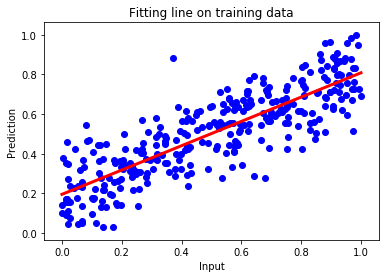

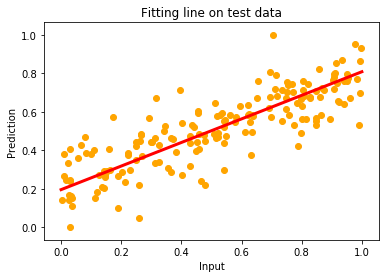

In [11]:
x_coords = X_1D[:,1]
y_coords = y_1D[:,0]
plt.scatter(x_coords, y_coords, color='blue', marker='o')

bias = w_1D[0]
slope = w_1D[1]

x1 = 0.0
y1 = slope*x1+bias
x2 = 1.0
y2 = slope*x2+bias

x_ = [x1,x2]
y_ = [y1, y2]

plt.plot(x_, y_, color='red', linewidth='3')
plt.xlabel('Input')
plt.ylabel('Prediction')
plt.title('Fitting line on training data')
plt.show()

x_coords_test = X_test_1D[:,1]
y_coords_test = y_test_1D[:,0]
plt.scatter(x_coords_test, y_coords_test, color='orange', marker='o')
plt.plot(x_, y_, color='red', linewidth='3')
plt.xlabel('Input')
plt.ylabel('Prediction')
plt.title('Fitting line on test data')
plt.show()